## Here is the code of our original model

In [ ]:
import torch
import torch.nn.functional as F  
from torchvision import datasets
import torchvision.transforms as transforms
import numpy as np
import random
import math
import time
!pip install geatpy
import geatpy as ea
from sklearn.decomposition import PCA
 

### Here is the Geatpy templet

In [ ]:
class MyProblem(ea.Problem): 
    def __init__(self):
        name = 'MyProblem' 
        M = 1 # the dimension of objective funtion, 1 for our project
        maxormins = [-1] # -1 denotes this is maximum problem
        Dim = 9810 # the dimension of chromosomes
        varTypes = [0] * Dim 
        lb = [-10] *Dim  
        ub = [10] *Dim 
        lbin = [1] * Dim 
        ubin = [1] * Dim 
        
        ea.Problem.__init__(self, name, M, maxormins, Dim, varTypes, lb, ub, lbin, ubin)
    
    def aimFunc(self, pop):
        f = Population_Fitness(pop.Phen)
        pop.ObjV = f 

gen|  eval  |    f_opt    |    f_max    |    f_avg    |    f_min    |    f_std    
----------------------------------------------------------------------------------
 0 |  100   | 1.70100E-01 | 1.70100E-01 | 9.93070E-02 | 4.02000E-02 | 2.85412E-02 
 1 |  200   | 1.96600E-01 | 1.96600E-01 | 1.11883E-01 | 4.60000E-02 | 2.77204E-02 
 2 |  300   | 1.96600E-01 | 1.96600E-01 | 1.24738E-01 | 6.99000E-02 | 2.66390E-02 
 3 |  400   | 1.96600E-01 | 1.96600E-01 | 1.31660E-01 | 6.99000E-02 | 2.61755E-02 
 4 |  500   | 2.12700E-01 | 2.12700E-01 | 1.41141E-01 | 9.09000E-02 | 2.67295E-02 
 5 |  600   | 2.82100E-01 | 2.82100E-01 | 1.51680E-01 | 9.73000E-02 | 2.91815E-02 
 6 |  700   | 2.82100E-01 | 2.82100E-01 | 1.57488E-01 | 9.73000E-02 | 2.94832E-02 
 7 |  800   | 2.82100E-01 | 2.82100E-01 | 1.63739E-01 | 1.00700E-01 | 3.03912E-02 
 8 |  900   | 2.82100E-01 | 2.82100E-01 | 1.70698E-01 | 1.00700E-01 | 3.53839E-02 
 9 |  1000  | 2.82100E-01 | 2.82100E-01 | 1.75911E-01 | 1.00700E-01 | 3.53802E-02 
 10|

/usr/local/lib/python3.7/dist-packages/matplotlib/textpath.py:84: RuntimeWarning: Glyph 31181 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
/usr/local/lib/python3.7/dist-packages/matplotlib/textpath.py:84: RuntimeWarning: Glyph 32676 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
/usr/local/lib/python3.7/dist-packages/matplotlib/textpath.py:84: RuntimeWarning: Glyph 20010 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
/usr/local/lib/python3.7/dist-packages/matplotlib/textpath.py:84: RuntimeWarning: Glyph 20307 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
/usr/local/lib/python3.7/dist-packages/matplotlib/textpath.py:84: RuntimeWarning: Glyph 24179 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
/usr/local/lib/python3.7/dist-packages/matplotlib/textpath.py:84: RuntimeWarning: Glyph 22343 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_H

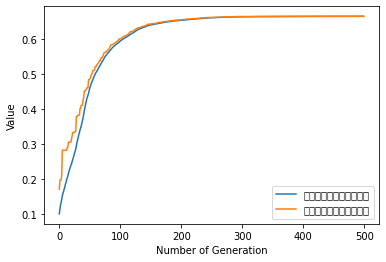

流式输出内容被截断，只能显示最后 5000 行内容。
1.3605494885213443
3.8474528303845696
3.9054589656123047
-1.6162291399515816
-0.39948254855259907
1.330005771853617
-3.3510681557617072
-0.87388968493668
-3.695422749689543
-1.0030415957405083
2.932505416505039
-1.9332064836481746
-2.2735902494668316
-2.784698833514215
3.1986545525643315
-2.3002788003313506
-0.9921626691057291
2.510435342336672
0.2557278391370191
2.417481791569574
1.2966900746529837
-2.9910254301125274
3.8272799287207393
-0.5059239070052304
3.493196407677537
-0.9675200173806733
-4.880431327569405
-0.7252807383729944
-4.747800491436632
-3.638467373769882
4.610310598413767
0.6701120214501843
4.553758412434444
-2.3271726952179796
3.929600956696402
-2.0794355972480307
-0.02500449260809294
-2.5374320134332553
3.783292314864809
3.94067593988452
-1.201773326604236
-2.634521276215574
2.9327741131755305
1.4175560403455334
-1.2386237164717757
4.945759632841717
4.5666093072388865
2.8104990096544515
4.174046096840617
4.462567888003866
-4.17218173786502
-

In [ ]:
# -*- coding: utf-8 -*-
"""main.py"""
# import geatpy as ea # import geatpy
# from MyProblem import MyProblem 

problem = MyProblem() 

Encoding = 'RI'       
NIND = 200            # the population size
Field = ea.crtfld(Encoding, problem.varTypes, problem.ranges, problem.borders) 
population = ea.Population(Encoding, Field, NIND) 
"""================================Setting==================================="""
myAlgorithm = ea.soea_DE_currentToBest_1_bin_templet(problem, population) #the templet of GA
myAlgorithm.MAXGEN = 500 # generation times
myAlgorithm.logTras = 1  
myAlgorithm.verbose = True  
myAlgorithm.drawing = 1  
"""===========================Begin=========================================="""
[BestIndi, population] = myAlgorithm.run()  #begin
BestIndi.save()  
"""==================================Result=================================="""
print('time：%f seconds' % myAlgorithm.passTime)
print('evaluate times：%d times' % myAlgorithm.evalsNum)
if BestIndi.sizes != 0:
    print('best acc：%s' % BestIndi.ObjV[0][0])
    print('best chromosome：')
    for i in range(BestIndi.Phen.shape[1]):
        print(BestIndi.Phen[0, i])
else:
    print('No feasible solution')

In [ ]:
# Some hyper-parameters
num_inputs = 784 
num_outputs = 10 
num_hiddens = 10

n_epochs = 10   
batch_size = 60000

# Load data set
transform=transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.1307,),(0.3081,))])

train_data = datasets.MNIST(root = './DataSet', train = True, download = True, transform = transform)
test_data = datasets.MNIST(root = './DataSet', train = False, download = True, transform = transform)

train_loader = torch.utils.data.DataLoader(train_data, batch_size = batch_size, num_workers = 0)
test_loader = torch.utils.data.DataLoader(test_data, batch_size = batch_size, num_workers = 0)



# the definition of our simple MLP
def NN(X, W_1, b_1, W_2, b_2):
    Y1 = F.relu(V1)
    V2 = torch.mm(Y1, W_2) + b_2
    Y = torch.argmax(F.softmax(V2, dim=1), dim = 1)
    
    return Y


# Cost function, is the accuracy of model
def Costfunction(W_1, b_1, W_2, b_2):

    Acc = []
    prediction = NN(data_set1, W_1, b_1, W_2, b_2)
    error = prediction - target_set1

    for item in error:
        if item == 0:
            Acc.append(1)
            
    return sum(Acc)/10000

# convert chromosome to weights and bias.
def Chromosome_to_Weights_Bias(chromosome):

    W_1 = chromosome[0:8700]
#     print('WWW', W_1.reshape(784,30).shape)
    W_1 = np.array(W_1, dtype='float32')
    W_1 = torch.from_numpy(W_1)
    W_1 = W_1.view(87, 100)
    
    b_1 = chromosome[8700:8800]
#     print('WWW', W_1.reshape(784,30).shape)
    b_1 = np.array(b_1, dtype='float32')
    b_1 = torch.from_numpy(b_1)
    b_1 = b_1.view(100)
    
    W_2 = chromosome[8800:9800]
    W_2 = np.array(W_2, dtype='float32')
    W_2 = torch.from_numpy(W_2)
    W_2 = W_2.view(100, 10)
    
    b_2 = chromosome[9800:]
    b_2 = np.array(b_2, dtype='float32')
    b_2 = torch.from_numpy(b_2)
    b_2 = b_2.view(10)
    
    return W_1, b_1, W_2, b_2


# main
def Population_Fitness(population):
    fitness = []
    
    for Chromosome in population:
        
        W_1, b_1, W_2, b_2 = Chromosome_to_Weights_Bias(Chromosome)
        Cost = Costfunction(W_1, b_1, W_2, b_2)
        
        fitness.append(np.array([Cost]))
  
    return np.array(fitness)


  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./DataSet/MNIST/raw/train-images-idx3-ubyte.gz to ./DataSet/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./DataSet/MNIST/raw/train-labels-idx1-ubyte.gz to ./DataSet/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./DataSet/MNIST/raw/t10k-images-idx3-ubyte.gz to ./DataSet/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./DataSet/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./DataSet/MNIST/raw



In [ ]:
# derive 10000 pictures as the train set

for x,y in train_loader:
    x = x.view(-1, 784)
    pca = PCA(0.9)
    x_train_reduction = pca.fit_transform(x)
    
    print(x_train_reduction.shape)
    
    data_set1 = torch.tensor(np.array(x_train_reduction[0:10000], dtype='float32'))
    target_set1 = y[0:10000]

(60000, 87)


In [ ]:
# derive the test set
for x,y in test_loader:
    x = x.view(-1, 784)

    x_train_reduction = pca.transform(x)
    test_set = torch.tensor(np.array(x_train_reduction, dtype='float32'))
    test_target_set = y

In [ ]:
# Save the weights and bias.
import pandas as pd
x = []
for i in range(BestIndi.Phen.shape[1]):
        x.append(BestIndi.Phen[0, i])
x = pd.DataFrame(x)
x.to_csv('10000-20000.csv')